**Name:** Mahendra Pratap Singh | **Reg ID:**  GO_STP_7372 | **Intern at:** Goeduhub Technologies | **logistic regression**

Predict retention of an employee within an organization such that whether the employee will leave the company or continue with it. An organization is only as good as its employees, and these people are the true source of its competitive advantage. Dataset is downloaded from Kaggle. Link: [**https://www.kaggle.com/giripujar/hr-analytics**]

First do data exploration and visualization, after this create a logistic regression model to predict Employee Attrition Using Machine Learning & Python.

#### Importing Libraries

In [45]:
from pandas import*
from numpy import*
import pandas as pd
import numpy as npregression
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import*
from sklearn.linear_model import LogisticRegression

#### Importing Datasets

In [59]:
data = read_csv('HR_comma_sep.csv')
data.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


####  Data exploration and visualization

In [3]:
data.shape

(14999, 10)

In [4]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### Missing values

In [9]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [10]:
sum(data.isna().sum(axis=0) > 0)

0

In [11]:
sum(data.isna().sum(axis=1) > 0)

0

<AxesSubplot:>

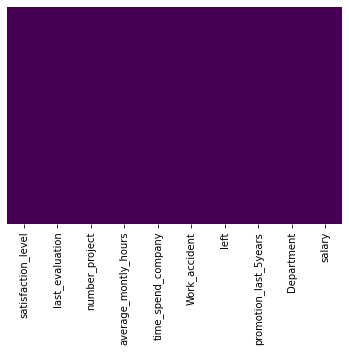

In [12]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [23]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,2.000000


In [13]:
data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000


In [60]:
data['salary'].replace('low',0, inplace=True)
data['salary'].replace('medium',1, inplace = True)
data['salary'].replace('high',2,inplace=True)

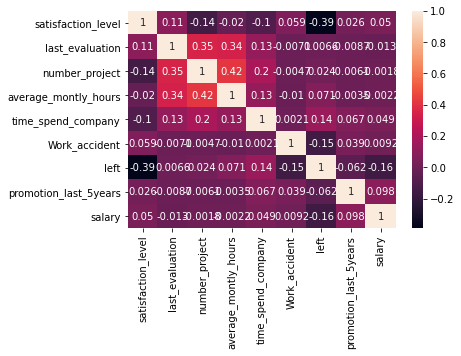

In [38]:
sns.heatmap(data.corr(), annot=True)
plt.show()

In [18]:
data['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [19]:
data['salary'].value_counts()

0    7316
1    6446
2    1237
Name: salary, dtype: int64

In [42]:
left_mean = data.groupby(['left']).mean()
left_mean

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
left,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,0.650945
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,0.414730


In [47]:
sal_mean = data.groupby(['salary']).mean()
sal_mean

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
0,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
1,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079
2,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205


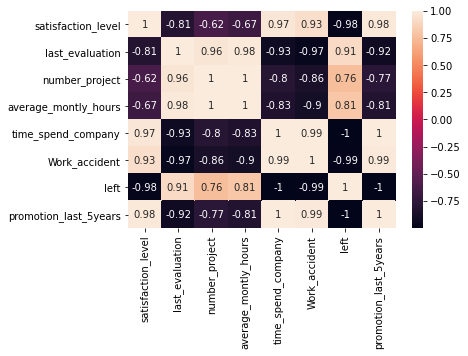

In [78]:
sns.heatmap(left_mean.corr(), annot=True)
plt.show()

#### Split the data

In [61]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [62]:
Label_one = LabelEncoder()
data.Department = Label_one.fit_transform(data.Department)
data.Department.unique()

array([7, 2, 3, 9, 8, 4, 0, 6, 5, 1])

In [63]:
data['salary'] = Label_one.fit_transform(data['salary'])
data['salary'].unique()

array([0, 1, 2])

In [67]:
x=data.drop(["left"],axis="columns")
y=data["left"]

In [68]:
print(t.shape)
print(data.shape)

(14999,)
(14999, 10)


In [69]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

#### Import and train the model

In [70]:
model = LogisticRegression(max_iter=1000)
model.fit(xtrain,ytrain)#fit the model

LogisticRegression(max_iter=1000)

In [71]:
ypred = model.predict(x_test) #ytest
print(ypred)

[0 0 0 ... 0 0 0]


In [72]:
model.score(x_test,y_test)

0.7933333333333333

#### Confusion matrix and

In [81]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,ypred)
cm

array([[2416,  437],
       [ 769,  128]])

#### Accuracy 

In [80]:
from sklearn.metrics import accuracy_score
print('The model Accuracy is:',accuracy_score(y_test,ypred)*100)

The model Accuracy is: 79.33333333333333
